In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
from sklearn import preprocessing

C:\Users\nikhi\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nikhi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\nikhi\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [4]:
pd.set_option('display.max_columns', 30)

In [5]:
import os
os.getcwd()

'C:\\Users\\nikhi'

In [6]:
os.chdir(r'C:\Users\nikhi\Desktop\MSc DS\2-Statistical Machine learning\sem 2\project')
ratings_train_df = pd.read_csv('ratings_train.csv')
ratings_test_df = pd.read_csv('ratings_test.csv')
movies_df= pd.read_csv('movies.csv')
pd.set_option('display.max_columns', 30)

In [7]:
ratings_test_df.head()

,userId,movieId,timestamp
0,73,49526,1255586478
1,187,47518,1237162935
2,150,788,1114306821
3,216,8830,1095792449
4,242,1227,956685476


In [8]:
ratings_train_df.head()

,userId,movieId,rating,timestamp
0,89,1385,3.0,1257610479
1,294,4816,4.0,1047072493
2,397,413,2.0,1268904250
3,273,5378,4.0,1466946309
4,213,4343,5.0,1462644087


In [9]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
# pd.options.display.float_format = '{:.6f}'.format

In [11]:
import pandas as pd

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset file
ratings_train_df = pd.read_csv('ratings_train.csv')

# Total number of rows and columns
num_rows, num_columns = ratings_train_df.shape
print("Total number of rows:", num_rows)
print("Total number of columns:", num_columns)

# Summary statistics for numerical columns
numerical_summary = ratings_train_df.describe()
print("\nSummary statistics for numerical columns:")
print(numerical_summary)

# Description of categorical columns
categorical_columns = ratings_train_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    unique_values = ratings_train_df[col].unique()
    frequency_distribution = ratings_train_df[col].value_counts()
    print("\nDescription of categorical column:", col)
    print("Unique categories:", unique_values)
    print("Frequency distribution:")
    print(frequency_distribution)


Total number of rows: 72753
Total number of columns: 4

Summary statistics for numerical columns:
             userId        movieId        rating     timestamp
count  72753.000000   72753.000000  72753.000000  7.275300e+04
mean     346.909433   12556.611150      3.541187  1.129813e+09
std      194.952195   26356.501615      1.059233  1.916311e+08
min        1.000000       1.000000      0.500000  7.896520e+08
25%      182.000000    1031.000000      3.000000  9.660099e+08
50%      365.000000    2409.000000      4.000000  1.110498e+09
75%      519.000000    5418.000000      4.000000  1.296193e+09
max      671.000000  163949.000000      5.000000  1.476641e+09


In [12]:
import pandas as pd

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset file
movies_df= pd.read_csv('movies.csv')

# Total number of rows and columns
num_rows, num_columns = movies_df.shape
print("Total number of rows:", num_rows)
print("Total number of columns:", num_columns)

# Summary statistics for numerical columns
numerical_summary = movies_df.describe()
print("\nSummary statistics for numerical columns:")
print(numerical_summary)

# Description of categorical columns
categorical_columns = movies_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    unique_values = movies_df[col].unique()
    frequency_distribution = movies_df[col].value_counts()
    print("\nDescription of categorical column:", col)
    print("Unique categories:", unique_values)
    print("Frequency distribution:")
    print(frequency_distribution)


Total number of rows: 9125
Total number of columns: 3

Summary statistics for numerical columns:
             movieId
count    9125.000000
mean    31123.291836
std     40782.633604
min         1.000000
25%      2850.000000
50%      6290.000000
75%     56274.000000
max    164979.000000

Description of categorical column: title
Unique categories: ['Toy Story (1995)' 'Jumanji (1995)' 'Grumpier Old Men (1995)' ...
 'The Beatles: Eight Days a Week - The Touring Years (2016)'
 'The Gay Desperado (1936)' "Women of '69, Unboxed"]
Frequency distribution:
title
Hamlet (2000)                             2
War of the Worlds (2005)                  2
Toy Story (1995)                          1
League of Ordinary Gentlemen, A (2004)    1
The 3 Penny Opera (1931)                  1
                                         ..
What Lies Beneath (2000)                  1
Five Senses, The (1999)                   1
Chuck & Buck (2000)                       1
X-Men (2000)                              1
Wo

In [13]:
print("Frequency distribution:")
print(frequency_distribution)

Frequency distribution:
genres
Drama                                                 1170
Comedy                                                 809
Comedy|Drama                                           425
Documentary                                            365
Drama|Romance                                          356
                                                      ... 
Adventure|Comedy|Crime|Thriller                          1
Comedy|War|Western                                       1
Action|Adventure|Animation|Children|Fantasy|Sci-Fi       1
Mystery|Sci-Fi                                           1
Action|Adventure|Animation|Drama|Fantasy|Sci-Fi          1
Name: count, Length: 902, dtype: int64


In [14]:
duplicate_titles = movies_df[movies_df.duplicated('title', keep=False)].sort_values('title')
duplicate_titles

,movieId,title,genres
2872,3598,Hamlet (2000),Crime|Drama|Romance|Thriller
7151,65665,Hamlet (2000),Drama
6172,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
7127,64997,War of the Worlds (2005),Action|Sci-Fi


In [15]:
merged_df = pd.merge(movies_df, ratings_train_df, on='movieId', how='right')

In [16]:
merged_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1385,Under Siege (1992),Action|Drama|Thriller,89,3.0,1257610479
1,4816,Zoolander (2001),Comedy,294,4.0,1047072493
2,413,Airheads (1994),Comedy,397,2.0,1268904250
3,5378,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX,273,4.0,1466946309
4,4343,Evolution (2001),Comedy|Sci-Fi,213,5.0,1462644087


In [17]:
import pandas as pd
import numpy as np

# Merge datasets using a right join on 'movieId'
merged_df = pd.merge(movies_df, ratings_train_df, on='movieId', how='right')

In [18]:
missing_values = merged_df.isna().sum()

# Print the count of missing values for each column
print("Missing values count per column:")
print(missing_values)

Missing values count per column:
movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64


In [19]:
# One-hot encoding for 'genres' column
genres_one_hot = merged_df['genres'].str.get_dummies(sep='|')
merged_df = pd.concat([merged_df.drop(['genres', 'title'], axis=1), genres_one_hot], axis=1)

# Convert 'timestamp' to datetime and extract features
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='s')
merged_df['year'] = merged_df['timestamp'].dt.year
merged_df['month'] = merged_df['timestamp'].dt.month
merged_df['day_of_week'] = merged_df['timestamp'].dt.dayofweek
merged_df['hour'] = merged_df['timestamp'].dt.hour

In [20]:
merged_df.head()

,movieId,userId,rating,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,month,day_of_week,hour
0,1385,89,3.0,2009-11-07 16:14:39,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2009,11,5,16
1,4816,294,4.0,2003-03-07 21:28:13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2003,3,4,21
2,413,397,2.0,2010-03-18 09:24:10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,3,3,9
3,5378,273,4.0,2016-06-26 13:05:09,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2016,6,6,13
4,4343,213,5.0,2016-05-07 18:01:27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2016,5,5,18


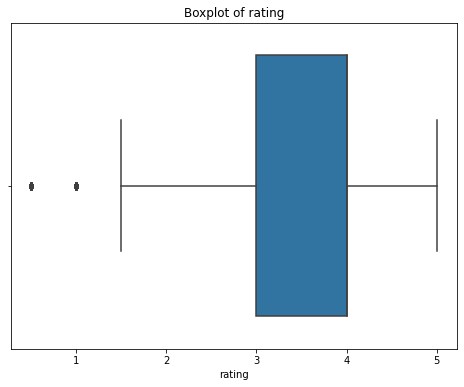

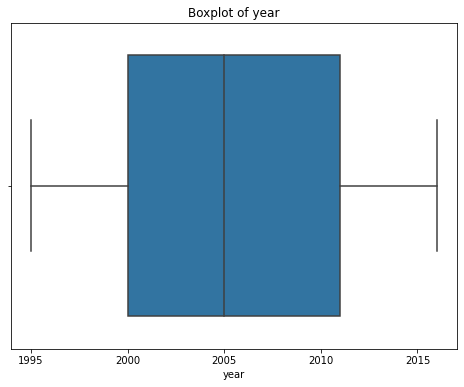

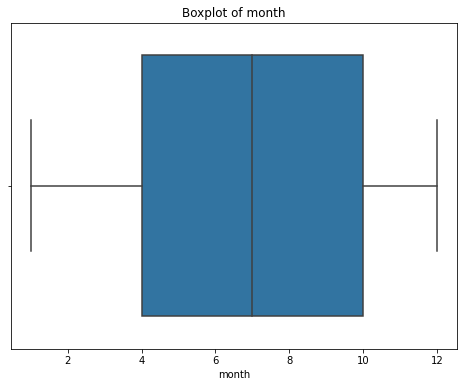

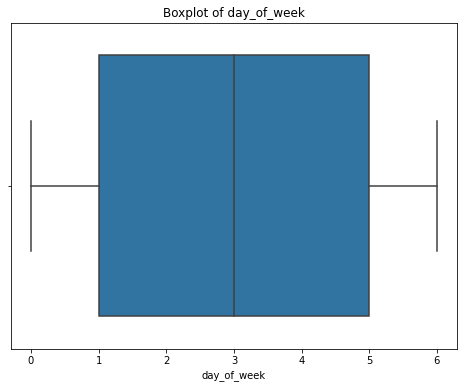

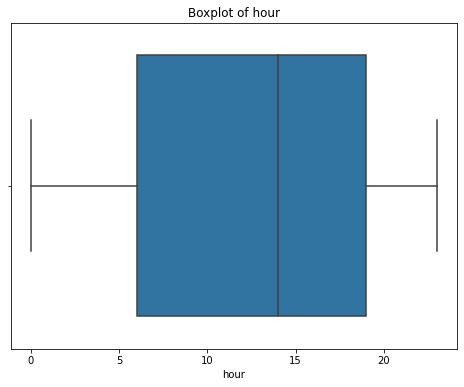

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns for which you want to check outliers
columns_to_check = ['rating', 'year', 'month', 'day_of_week', 'hour']

# Create box plots for each specified column
for column in columns_to_check:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, data=merged_df)
    plt.title(f'Boxplot of {column}')
    plt.show()


In [22]:
# Check for missing values in the DataFrame
missing_values = merged_df.isna().sum()

# Print the count of missing values for each column
print("Missing values count per column:")
print(missing_values)

Missing values count per column:
movieId               0
userId                0
rating                0
timestamp             0
(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
year                  0
month                 0
day_of_week           0
hour                  0
dtype: int64


In [23]:
import pandas as pd
import numpy as np

# Merge datasets using a right join on 'movieId'
merged_df = pd.merge(movies_df, ratings_train_df, on='movieId', how='right')

# One-hot encoding for 'genres' column
genres_one_hot = merged_df['genres'].str.get_dummies(sep='|')
merged_df = pd.concat([merged_df.drop(['genres', 'title'], axis=1), genres_one_hot], axis=1)

# Convert 'timestamp' to datetime and extract features
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='s')
merged_df['year'] = merged_df['timestamp'].dt.year
merged_df['month'] = merged_df['timestamp'].dt.month
merged_df['day_of_week'] = merged_df['timestamp'].dt.dayofweek
merged_df['hour'] = merged_df['timestamp'].dt.hour

# Cyclic feature conversion
merged_df['month_sin'] = np.sin(2 * np.pi * merged_df['month'] / 12)
merged_df['month_cos'] = np.cos(2 * np.pi * merged_df['month'] / 12)
merged_df['day_of_week_sin'] = np.sin(2 * np.pi * merged_df['day_of_week'] / 7)
merged_df['day_of_week_cos'] = np.cos(2 * np.pi * merged_df['day_of_week'] / 7)
merged_df['hour_sin'] = np.sin(2 * np.pi * merged_df['hour'] / 24)
merged_df['hour_cos'] = np.cos(2 * np.pi * merged_df['hour'] / 24)

# Determine seasons and convert to one-hot encoding without 'season_' prefix
merged_df['season'] = merged_df['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Autumn')))
season_one_hot = pd.get_dummies(merged_df['season'], prefix='', prefix_sep='')
merged_df = pd.concat([merged_df.drop(['season', 'timestamp', 'month', 'day_of_week', 'hour'], axis=1), season_one_hot], axis=1)

# Display one row of the dataframe
print(merged_df.shape)
merged_df.head(1)

# 0.890172279620636

(72753, 34)


,movieId,userId,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,...,Sci-Fi,Thriller,War,Western,year,month_sin,month_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,Autumn,Spring,Summer,Winter
0,1385,89,3.0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,2009,-0.5,0.866025,-0.974928,-0.222521,-0.866025,-0.5,True,False,False,False


In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72753 entries, 0 to 72752
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             72753 non-null  int64  
 1   userId              72753 non-null  int64  
 2   rating              72753 non-null  float64
 3   (no genres listed)  72753 non-null  int64  
 4   Action              72753 non-null  int64  
 5   Adventure           72753 non-null  int64  
 6   Animation           72753 non-null  int64  
 7   Children            72753 non-null  int64  
 8   Comedy              72753 non-null  int64  
 9   Crime               72753 non-null  int64  
 10  Documentary         72753 non-null  int64  
 11  Drama               72753 non-null  int64  
 12  Fantasy             72753 non-null  int64  
 13  Film-Noir           72753 non-null  int64  
 14  Horror              72753 non-null  int64  
 15  IMAX                72753 non-null  int64  
 16  Musi

In [25]:
#model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

In [26]:
# Assign features to X
x = merged_df.drop('rating', axis=1)
y = merged_df['rating']

# splitting into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1, stratify=y)

In [27]:
#RandomForestClassifier
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_y_pred)
print(rf_mse)

0.890172279620636


# Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the Grid Search model
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_

# Best score (negative mean squared error) found
best_score = np.sqrt(-grid_search.best_score_)

best_params, best_score


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


In [21]:
#RandomForestClassifier
rf_model =  RandomForestRegressor(
    max_depth=None,
    max_features=0.5,
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=200,
    random_state=42  # for reproducibility
)

rf_model.fit(X_train, y_train)
rf_model_best_params = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_y_pred)
print(rf_mse)

0.8520141036817274


In [22]:
rf_model_best_params = rf_model.predict(X_test)

In [24]:
rf_model_best_params.shape

(21826,)

# Test data

In [25]:
ratings_test_df = pd.read_csv('ratings_test.csv')
movies_df= pd.read_csv('movies.csv')

In [27]:
import pandas as pd
import numpy as np

# Merge datasets using a right join on 'movieId'
test_df = pd.merge(movies_df, ratings_test_df, on='movieId', how='right')

# One-hot encoding for 'genres' column
genres_one_hot = test_df['genres'].str.get_dummies(sep='|')
test_df = pd.concat([test_df.drop(['genres', 'title'], axis=1), genres_one_hot], axis=1)

# Convert 'timestamp' to datetime and extract features
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'], unit='s')
test_df['year'] = test_df['timestamp'].dt.year
test_df['month'] = test_df['timestamp'].dt.month
test_df['day_of_week'] = test_df['timestamp'].dt.dayofweek
test_df['hour'] = test_df['timestamp'].dt.hour

# Cyclic feature conversion
test_df['month_sin'] = np.sin(2 * np.pi * test_df['month'] / 12)
test_df['month_cos'] = np.cos(2 * np.pi * test_df['month'] / 12)
test_df['day_of_week_sin'] = np.sin(2 * np.pi * test_df['day_of_week'] / 7)
test_df['day_of_week_cos'] = np.cos(2 * np.pi * test_df['day_of_week'] / 7)
test_df['hour_sin'] = np.sin(2 * np.pi * test_df['hour'] / 24)
test_df['hour_cos'] = np.cos(2 * np.pi * test_df['hour'] / 24)

# Determine seasons and convert to one-hot encoding without 'season_' prefix
test_df['season'] = test_df['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Autumn')))
season_one_hot = pd.get_dummies(test_df['season'], prefix='', prefix_sep='')
test_df = pd.concat([test_df.drop(['season', 'timestamp', 'month', 'day_of_week', 'hour'], axis=1), season_one_hot], axis=1)

# Display one row of the dataframe
print(test_df.shape)
test_df.head(1)

(24720, 33)


,movieId,userId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,...,Sci-Fi,Thriller,War,Western,year,month_sin,month_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,Autumn,Spring,Summer,Winter
0,49526,73,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,2009,-0.866025,0.5,0.433884,-0.900969,1.0,6.123234e-17,1,0,0,0


In [28]:
prediction = rf_model.predict(test_df)

In [30]:
adjusted_predictions = np.round(prediction * 2) / 2

In [32]:
adjusted_predictions.shape

(24720,)

In [33]:
# Create a DataFrame with the adjusted predictions
df_predictions = pd.DataFrame({'adjusted_predictions': adjusted_predictions})

# Write the DataFrame to a CSV file
df_predictions.to_csv('film_rating_predictions_group_F_week_2.csv', index=False)